<a href="https://colab.research.google.com/github/GlenH0/AI-Mini-Project/blob/main/Cifra_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt


In [ ]:
from keras.datasets import cifar10
(train_img, train_lab),(test_img, test_lab) = cifar10.load_data()


In [ ]:
print(train_img.shape)
# 3 is the rgb colors
#training has 50k pics, test has 10k 
print(test_img.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


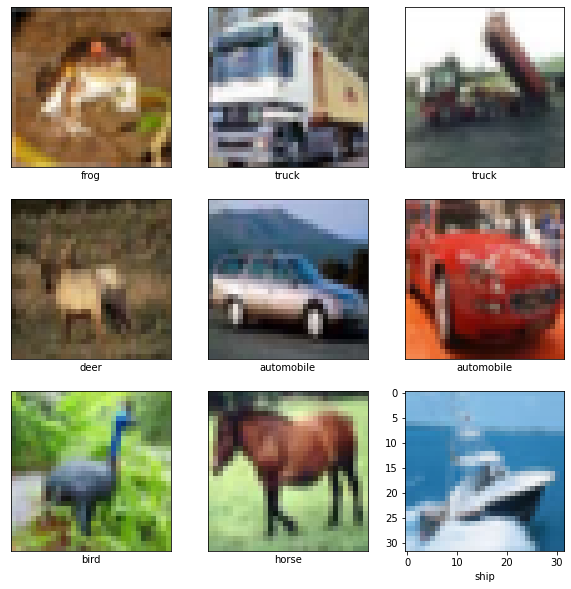

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range (9):
  # ticks is to remove the measurements on the pics
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3,3, i+1)
  plt.imshow(train_img[i])
  plt.xlabel(class_names[train_lab[i][0]])

plt.show()

In [ ]:
# to normalise dataset
train_img = train_img.astype('float32')
test_img = test_img.astype('float32')
train_img = train_img/255.0
test_img = test_img/255.0

In [ ]:
train_lab = np_utils.to_categorical(train_lab)
test_lab = np_utils.to_categorical(test_lab)
num_classes = test_lab.shape[1]

In [ ]:
# early stopping
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
# define checkpoints
checkpoint = ModelCheckpoint('cifar10_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compile model
epochs =40 
lrate = 0.001
decay = 1e-6
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [ ]:
# Fit the model
history= model.fit(train_img, train_lab, batch_size=32, validation_data=(test_img, test_lab), epochs=epochs, callbacks=[stop, checkpoint])

# Final evaluation of the model
scores = model.evaluate(test_img, test_lab, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/40
1558/1563 [============================>.] - ETA: 0s - loss: 2.1698 - accuracy: 0.1865
Epoch 00001: val_accuracy improved from -inf to 0.26170, saving model to cifar10_best_model.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.1695 - accuracy: 0.1868 - val_loss: 2.0415 - val_accuracy: 0.2617
Epoch 2/40
1559/1563 [============================>.] - ETA: 0s - loss: 1.9557 - accuracy: 0.2780
Epoch 00002: val_accuracy improved from 0.26170 to 0.33360, saving model to cifar10_best_model.h5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.9555 - accuracy: 0.2780 - val_loss: 1.8781 - val_accuracy: 0.3336
Epoch 3/40
1556/1563 [============================>.] - ETA: 0s - loss: 1.7777 - accuracy: 0.3446
Epoch 00003: val_accuracy improved from 0.33360 to 0.39370, saving model to cifar10_best_model.h5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7771 - accuracy: 0.3448 - val_loss: 1.6914 - val_accuracy: 0.3937
Epoch 4/40
15

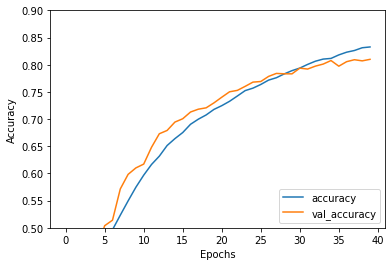

In [ ]:
plt.plot(history.history['accuracy'], label ='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,0.9])
plt.legend(loc = 'lower right')

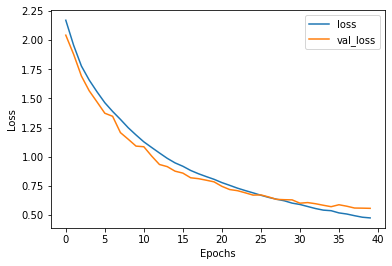

In [ ]:
plt.plot(history.history['loss'], label ='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc = 'upper right')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)       

In [ ]:
# Predict the values from the validation dataset
y_pred = model.predict(test_img)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(test_lab,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

Accuracy score: 0.8099
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.87      0.93      0.90      1000
           2       0.75      0.71      0.73      1000
           3       0.71      0.58      0.64      1000
           4       0.77      0.79      0.78      1000
           5       0.69      0.77      0.73      1000
           6       0.84      0.88      0.86      1000
           7       0.83      0.85      0.84      1000
           8       0.87      0.91      0.89      1000
           9       0.91      0.85      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



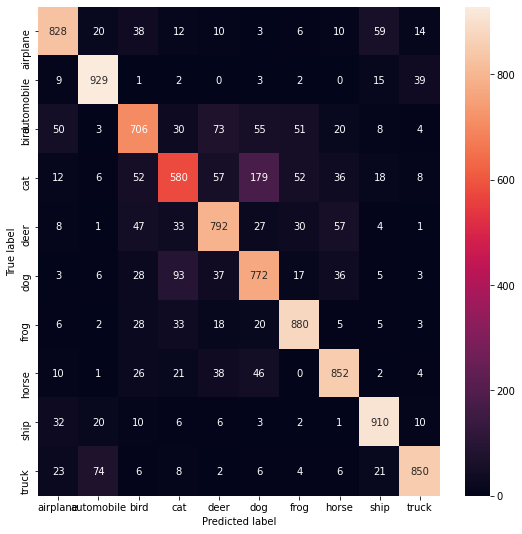

In [ ]:
import seaborn as sns
plt.figure(figsize=(9, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=class_names, yticklabels=class_names)

# label
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn import metrics
cnn_accuracy = metrics.accuracy_score(y_true, y_pred_classes)
print("Accuracy score: {}".format(cnn_accuracy))
plot_confusion_matrix(model, class_names)
print(metrics.classification_report(y_true, y_pred_classes))